In [ ]:
import os
import logging
import pandas as pd
from pathlib import Path
from hydra import compose, initialize
from hydra.core.hydra_config import HydraConfig

import sweetviz as sv

In [ ]:
OVERRIDES: list[str] = os.getenv("OVERRIDES", "experiment=001-tabular_v01").split(",")

In [ ]:
if OVERRIDES is None:
    raise ValueError("OVERRIDES is not set")

with initialize(version_base=None, config_path="../configs"):
    CFG = compose(
        config_name="config.yaml",
        return_hydra_config=True,
        overrides=OVERRIDES,
    )
    HydraConfig.instance().set_config(CFG)  # use HydraConfig for notebook to use hydra job

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

if not logger.handlers:
    handler = logging.StreamHandler()
    logger.addHandler(handler)


INPUT_DIR = Path(CFG.paths.input_dir)

### Load Data


In [ ]:
train_df = pd.read_csv(INPUT_DIR / "train.csv")
test_df = pd.read_csv(INPUT_DIR / "test.csv")

In [ ]:
feature_config = sv.FeatureConfig(force_num=["health"], skip=["Unnamed: 0"])
report = sv.compare(train_df, test_df, feat_cfg=feature_config)

In [ ]:
report_path = Path(CFG.paths.resource_dir) / "eda.html"
report_path.parent.mkdir(parents=True, exist_ok=True)

report.show_html(report_path)


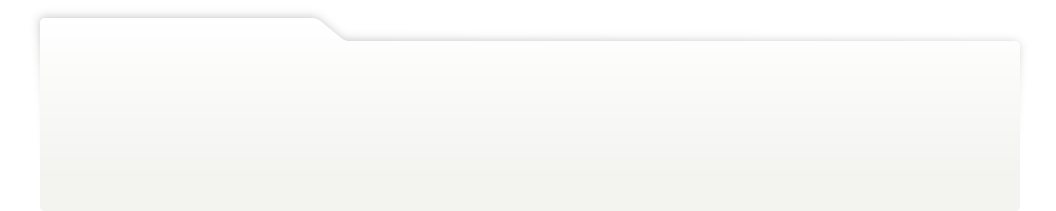
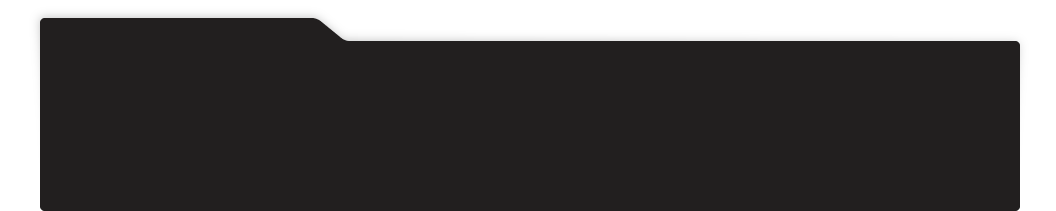
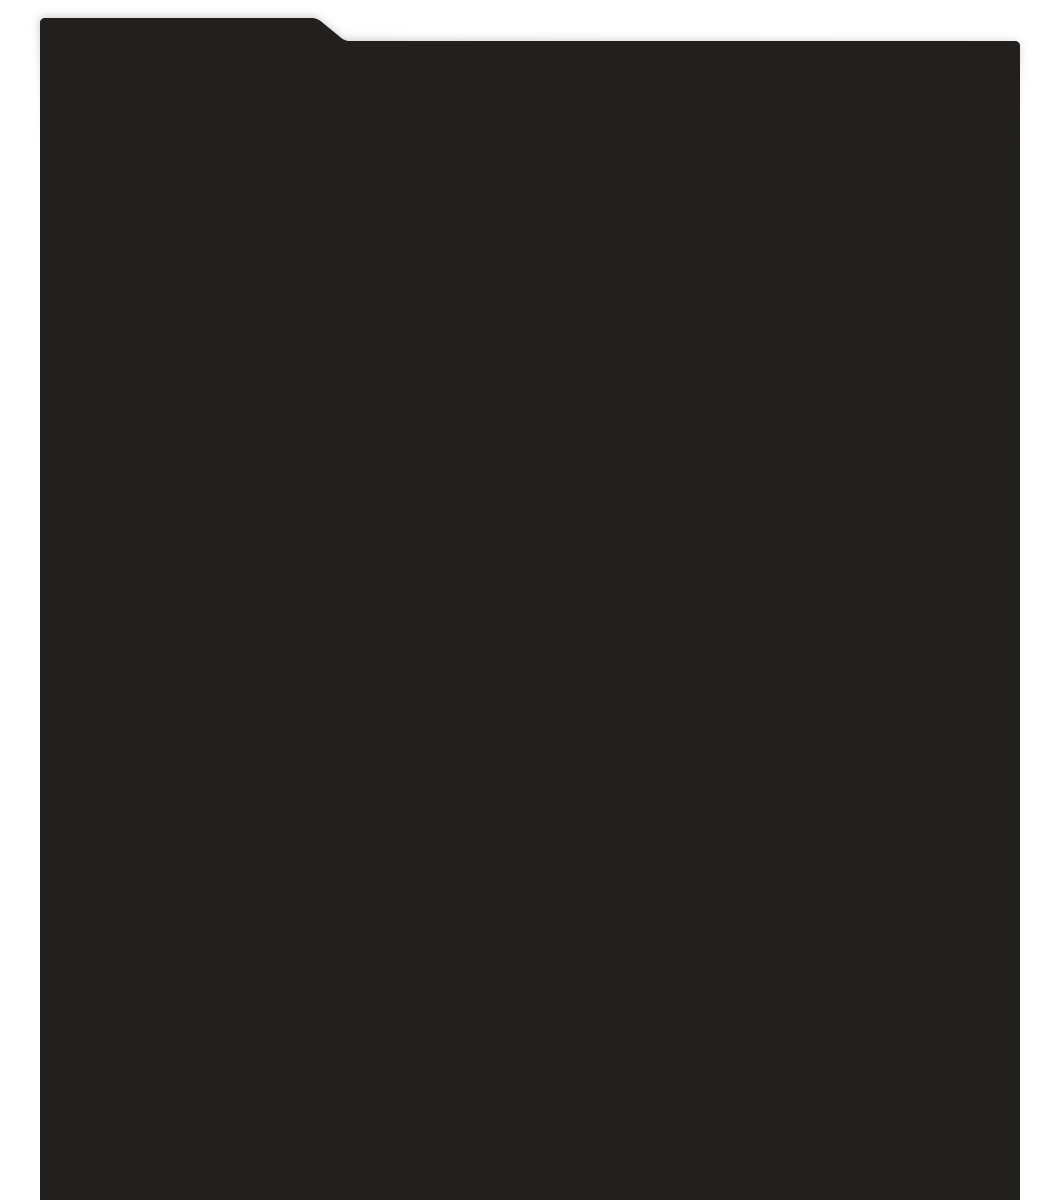
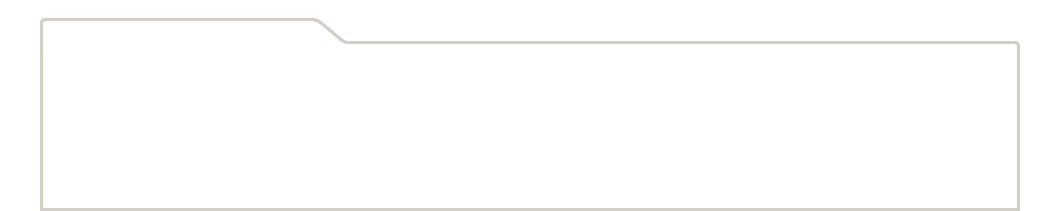
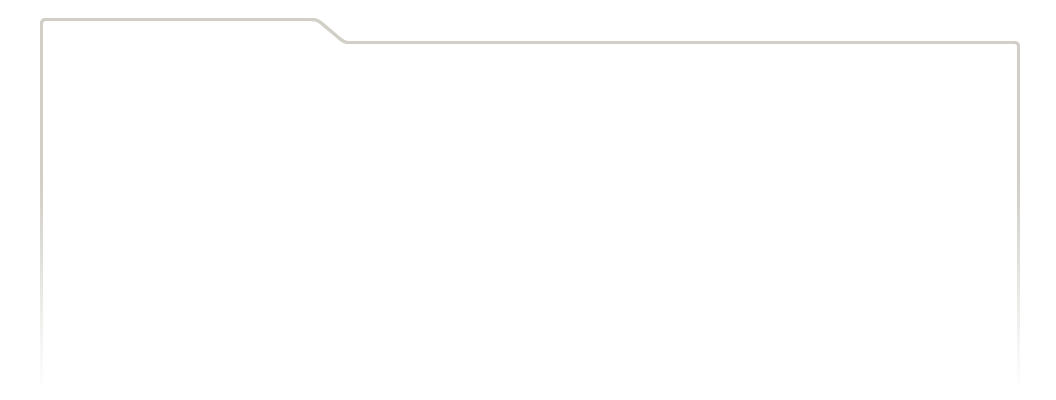
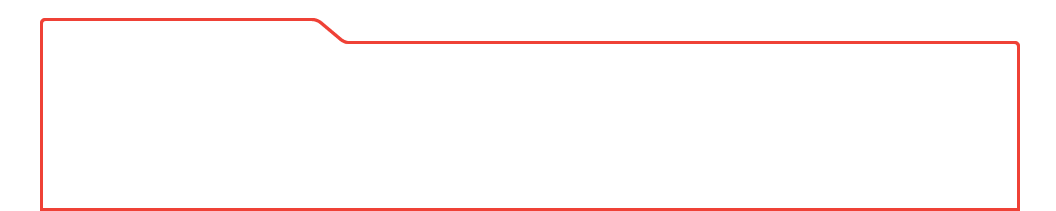
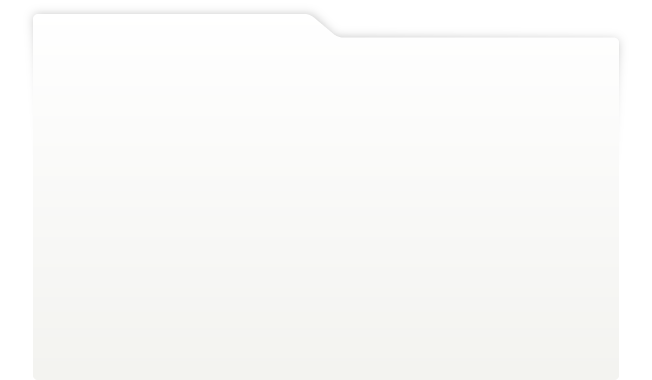
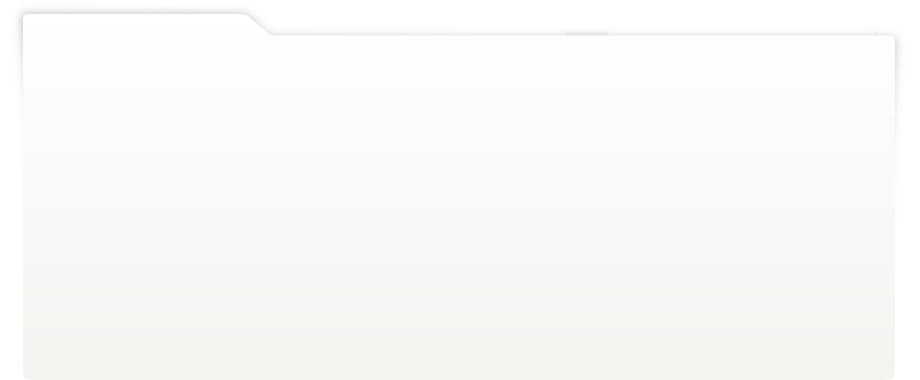
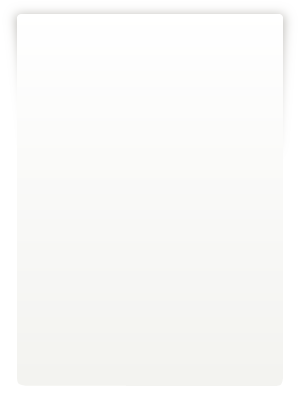
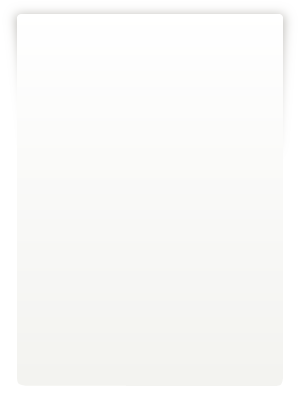
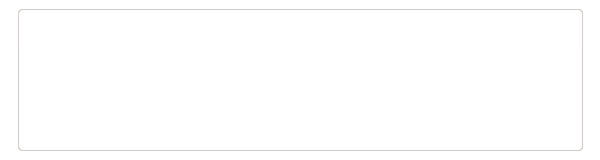
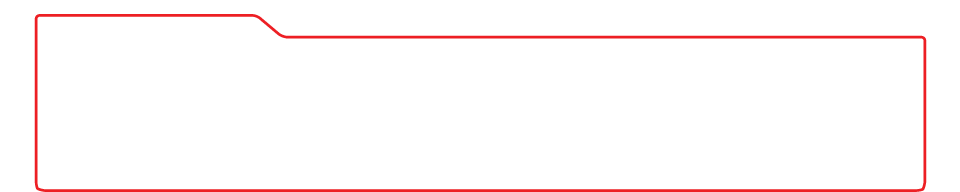
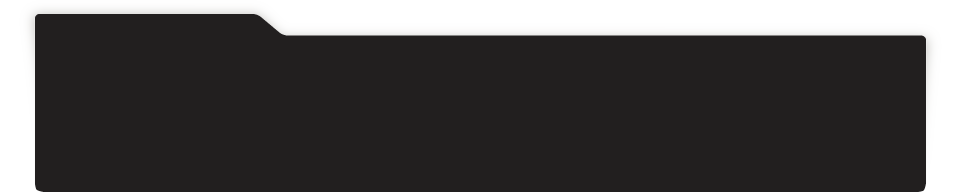
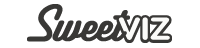
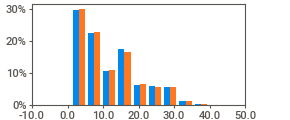
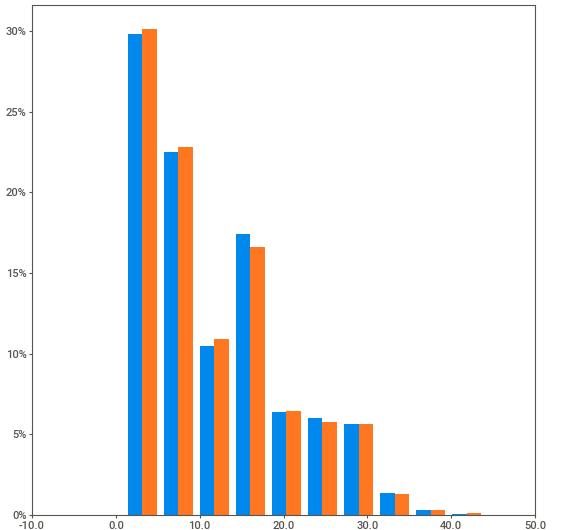
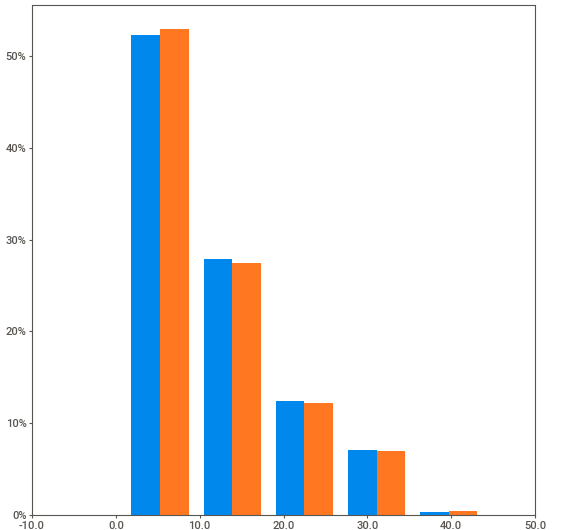
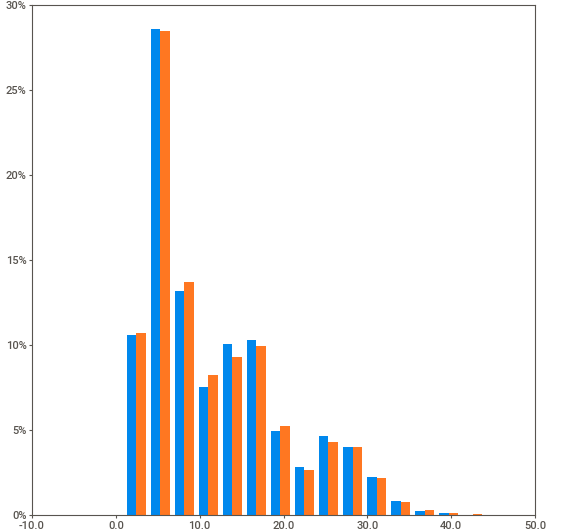
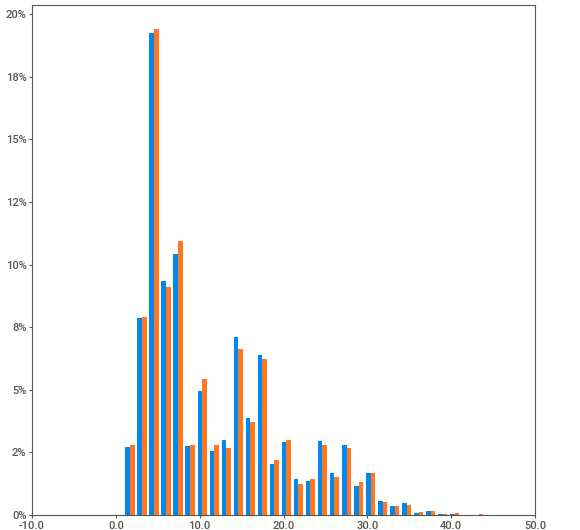
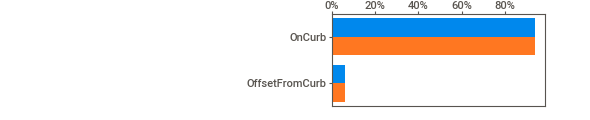
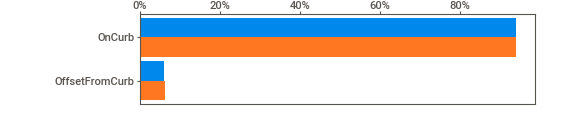
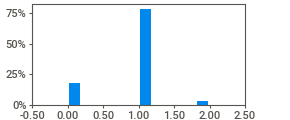
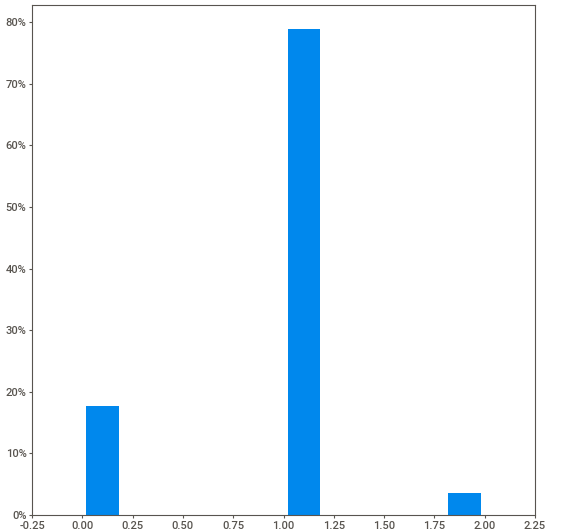
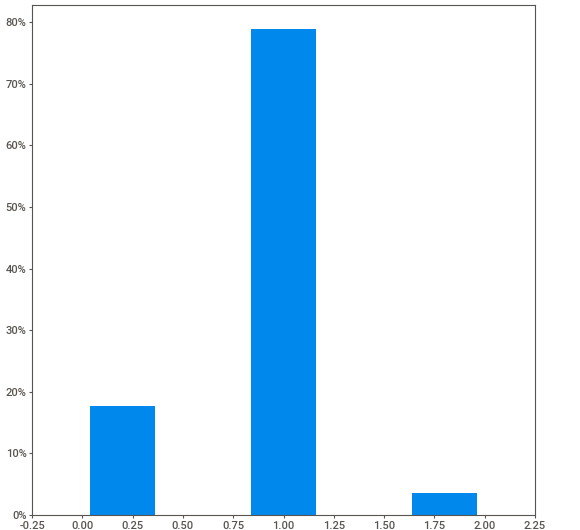
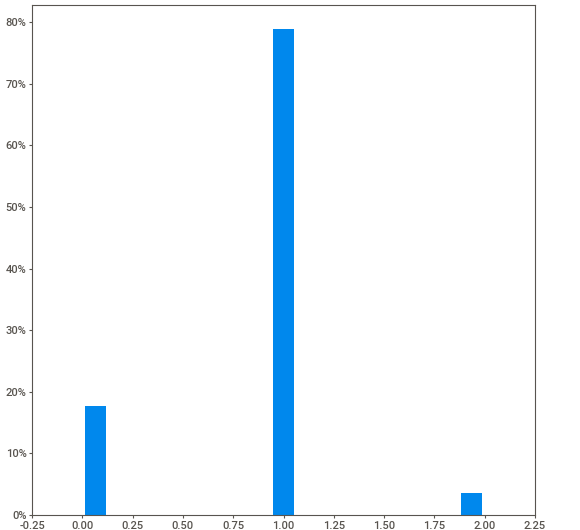
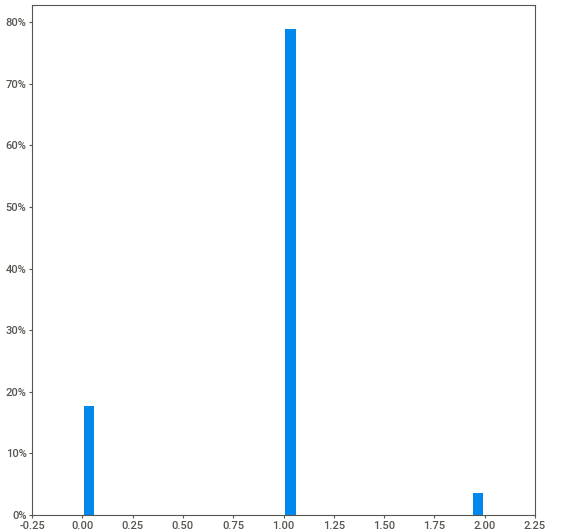
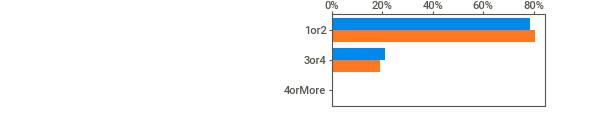
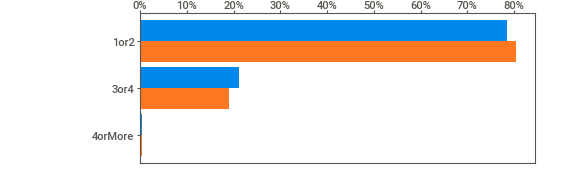
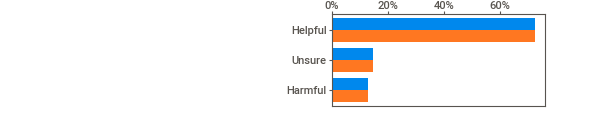
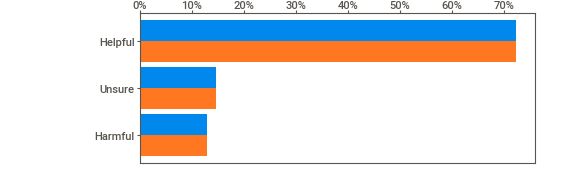
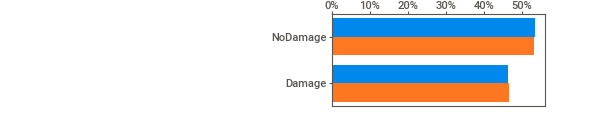
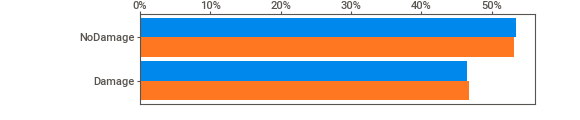
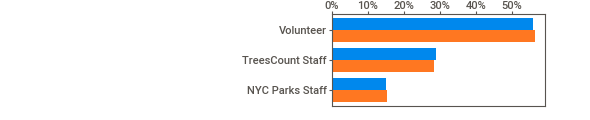
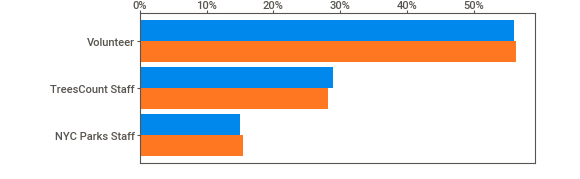
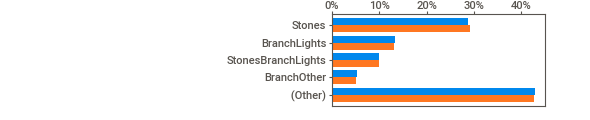
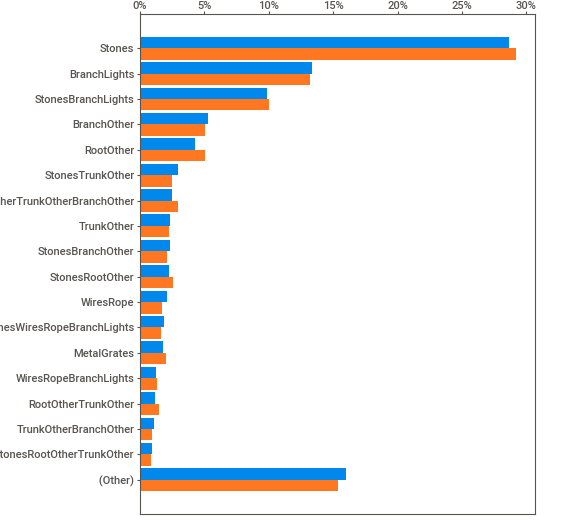
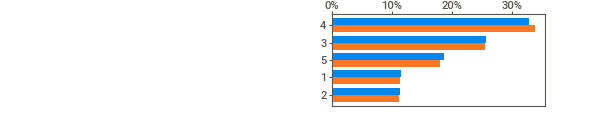
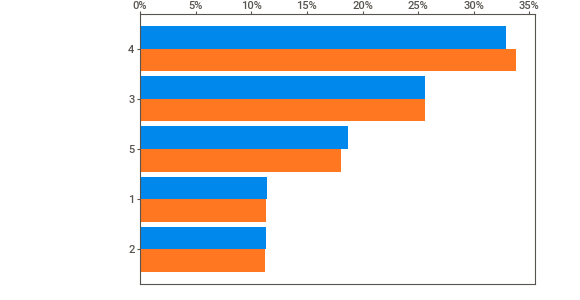
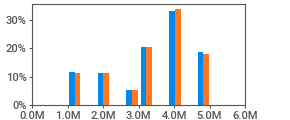
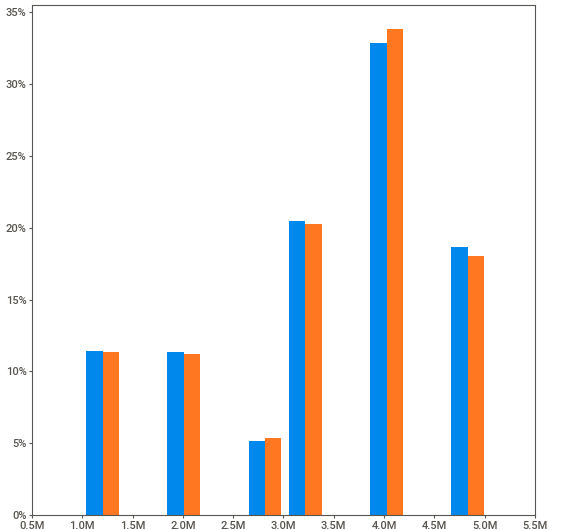
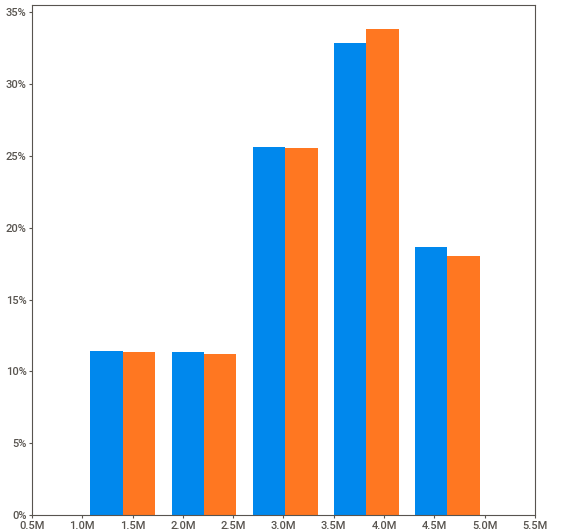
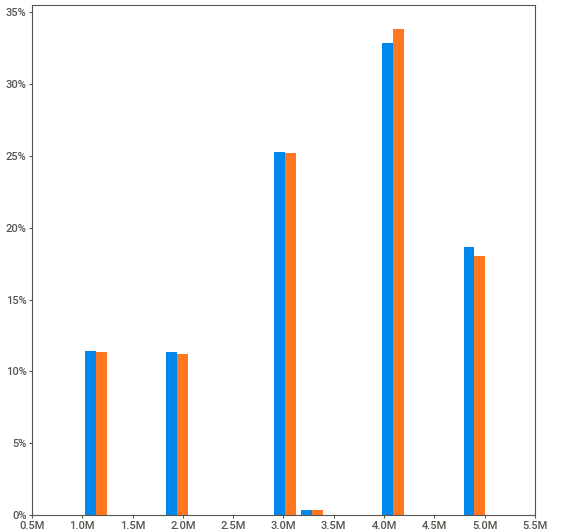
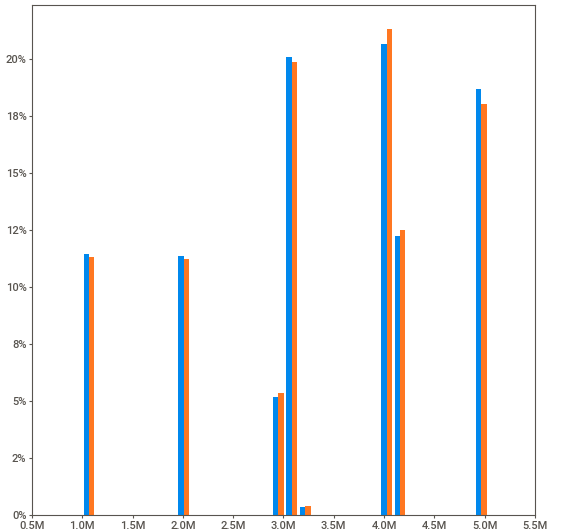
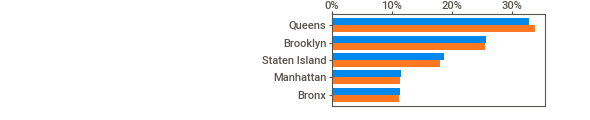
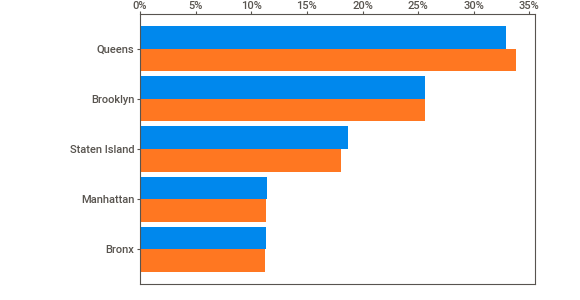
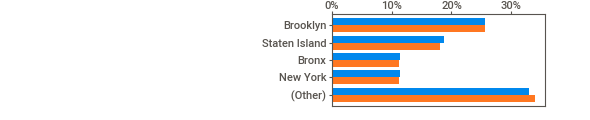
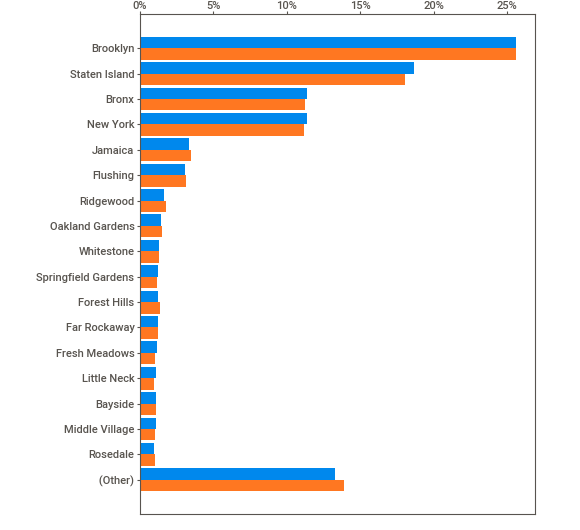
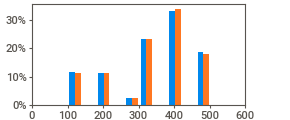
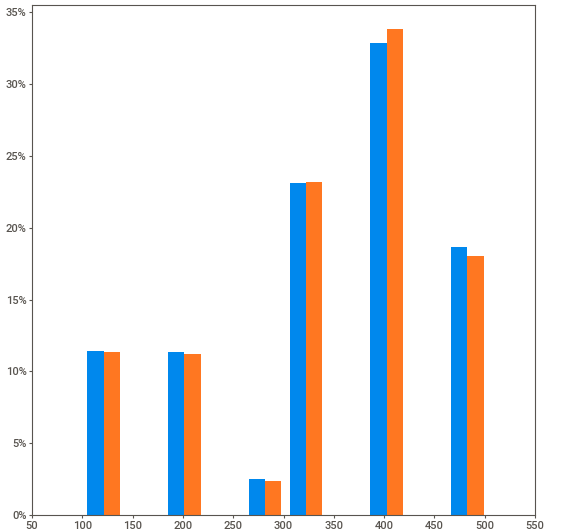
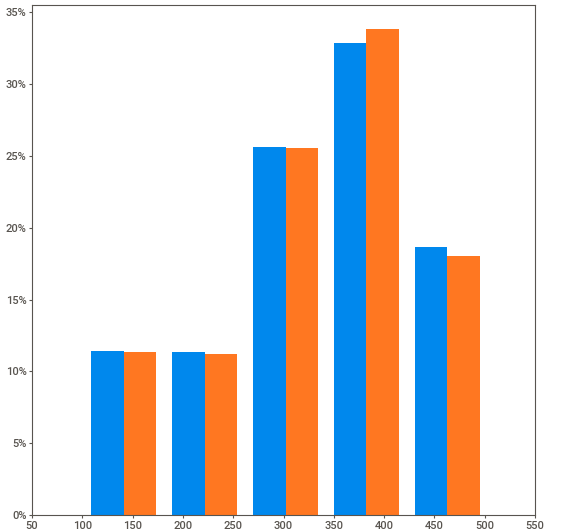
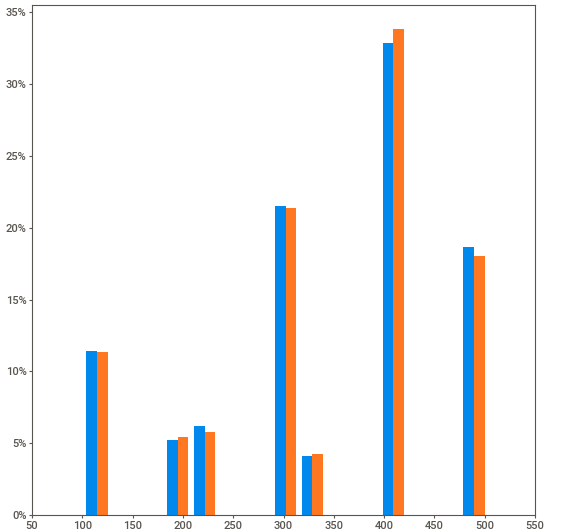
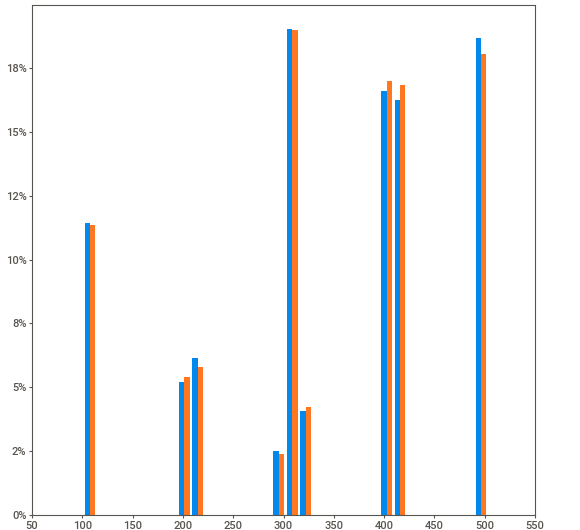
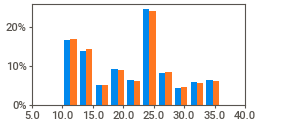
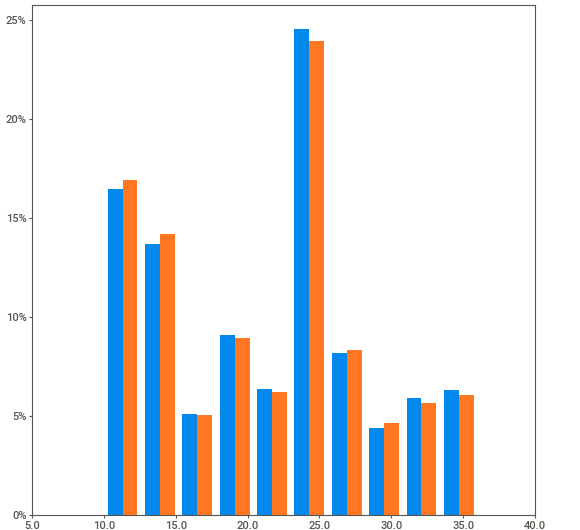
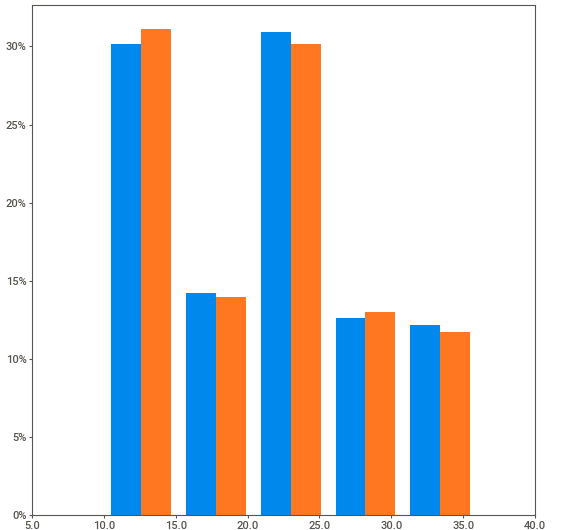
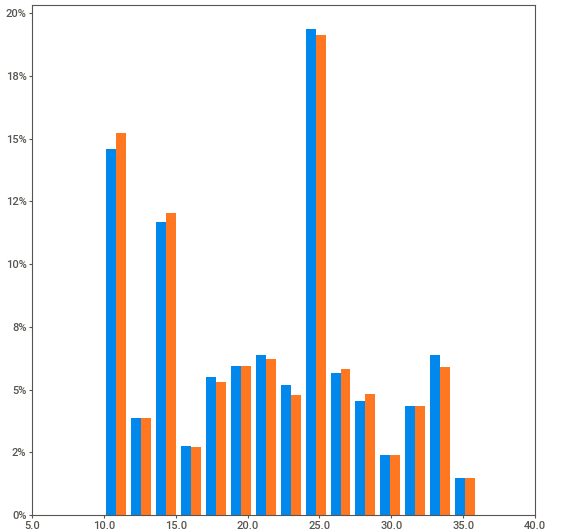
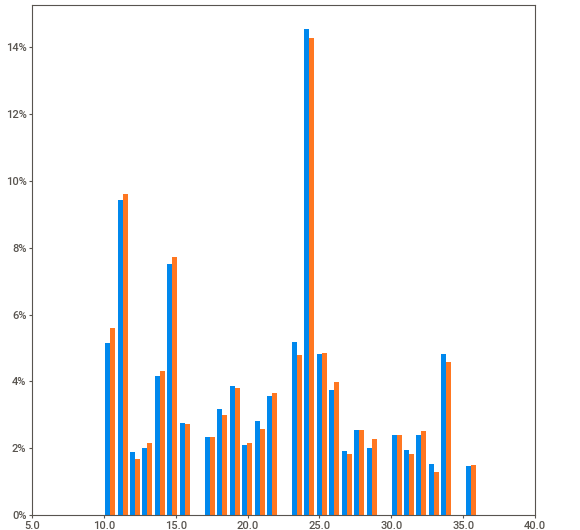
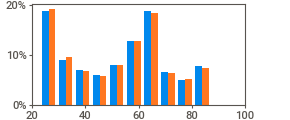
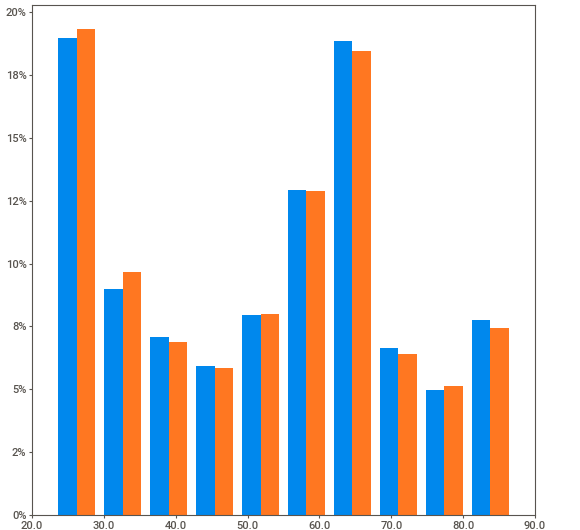
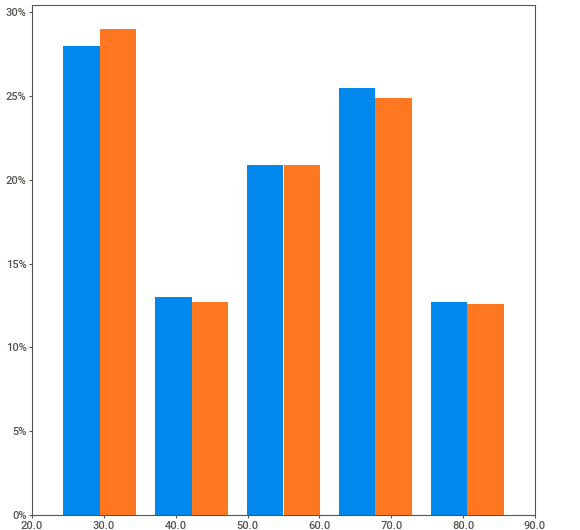
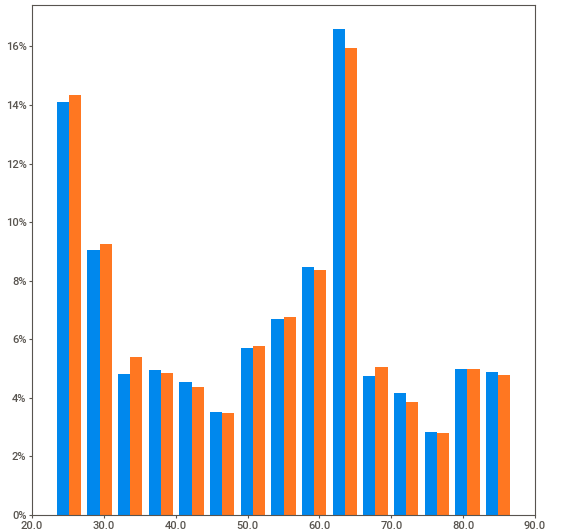
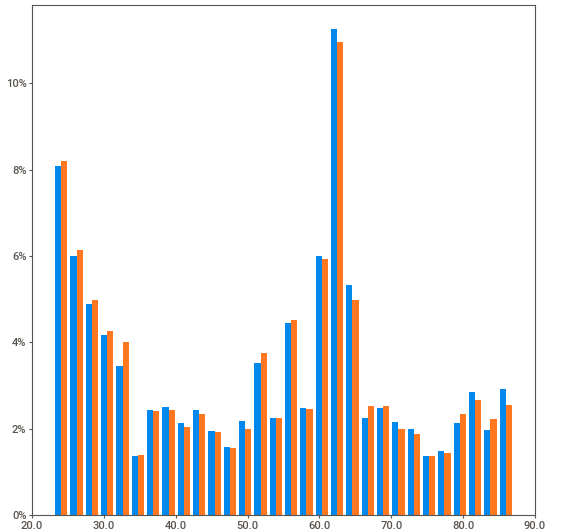
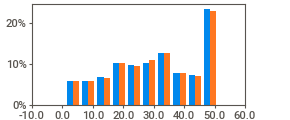
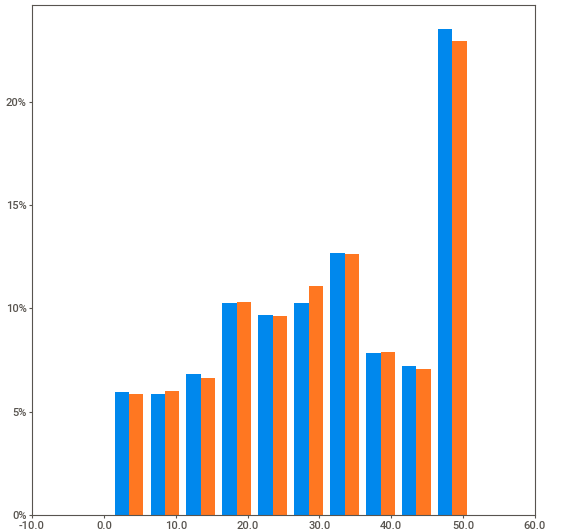
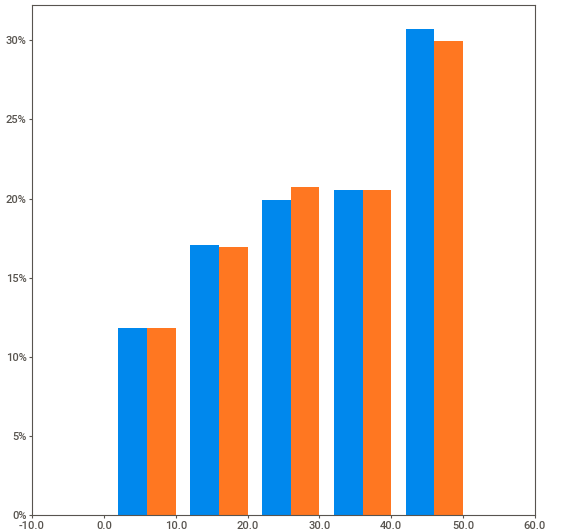
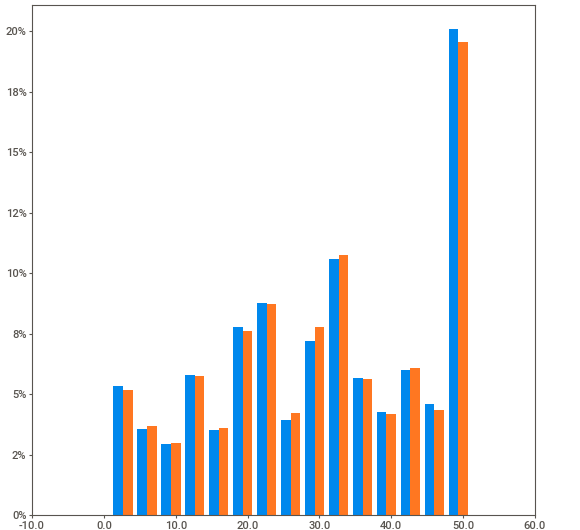
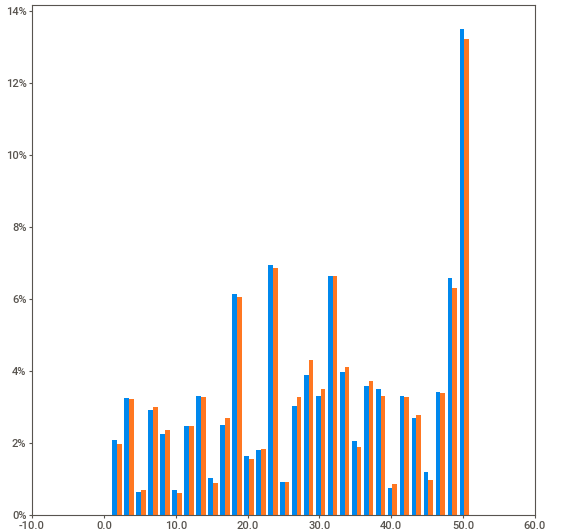
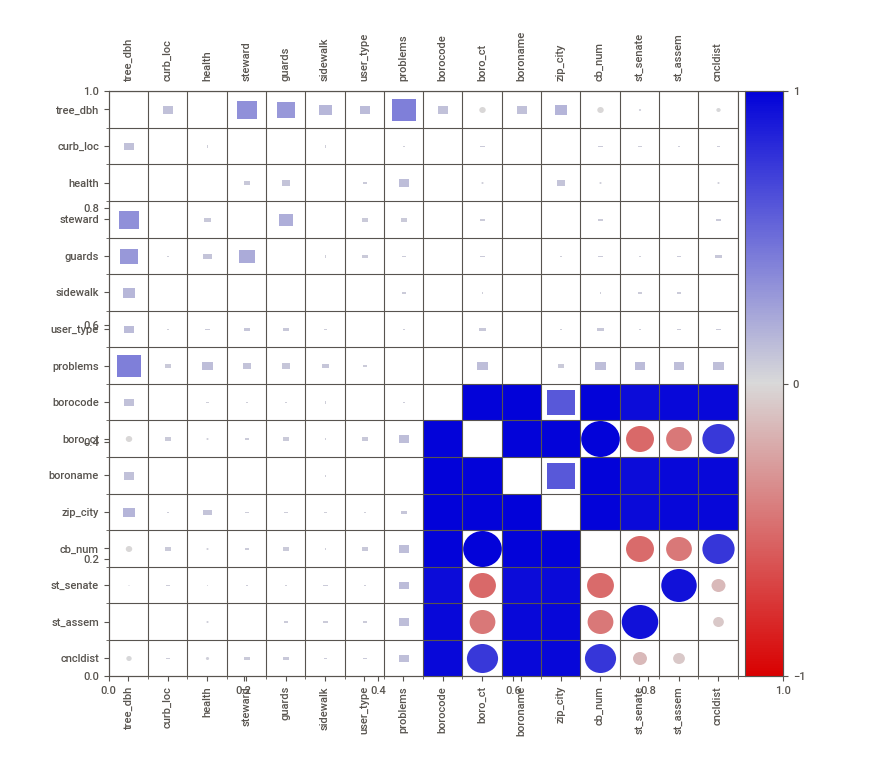
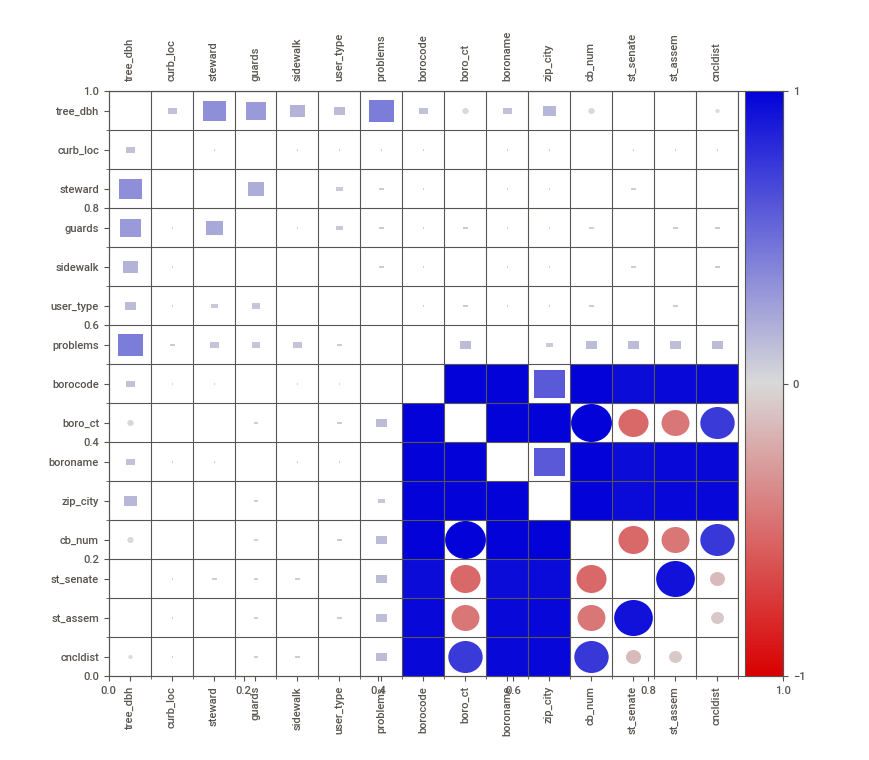

In [13]:
report.show_notebook()